In [25]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch03 군집화(비지도학습)</font>

# 1. 데이터 생성

- 남자, 여자의 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.randint(40, 95)  # 40부터 95까지의 정수 중 하나를 무작위 선택 반환

43

In [4]:
data = []
for i in range(50) :
    # 여자 데이터
    data.append([random.randint(40, 70), random.randint(140, 170)])
    # 남자 데이터
    data.append([random.randint(60, 95), random.randint(160, 195)])
#data

In [5]:
# 여자
for female in data[:100:2] :
    print(female, end=' ')
# 남자
print('\n-------------------------------')
for male in data[1:100:2] :
    print(male, end=' ')

[50, 157] [55, 151] [66, 155] [69, 161] [62, 143] [54, 155] [54, 146] [42, 160] [51, 152] [70, 144] [43, 144] [63, 158] [52, 158] [55, 161] [52, 166] [63, 157] [41, 161] [41, 157] [60, 148] [65, 146] [45, 152] [59, 167] [52, 160] [68, 167] [54, 170] [50, 141] [41, 141] [68, 143] [56, 169] [41, 157] [49, 167] [50, 166] [64, 141] [52, 169] [65, 164] [42, 169] [51, 169] [68, 169] [57, 161] [49, 147] [62, 144] [63, 152] [43, 144] [64, 145] [63, 143] [48, 145] [65, 167] [42, 166] [56, 141] [54, 148] 
-------------------------------
[66, 168] [71, 182] [74, 183] [85, 169] [60, 162] [77, 184] [72, 183] [63, 194] [81, 165] [95, 172] [93, 187] [69, 165] [82, 193] [88, 188] [86, 194] [85, 181] [70, 161] [92, 171] [72, 185] [64, 167] [87, 185] [88, 179] [77, 163] [61, 180] [61, 171] [75, 189] [65, 174] [89, 186] [71, 175] [95, 172] [88, 161] [94, 191] [84, 186] [63, 163] [77, 178] [69, 167] [89, 177] [92, 166] [65, 180] [83, 167] [73, 172] [65, 166] [76, 175] [92, 181] [86, 183] [74, 169] [72, 18

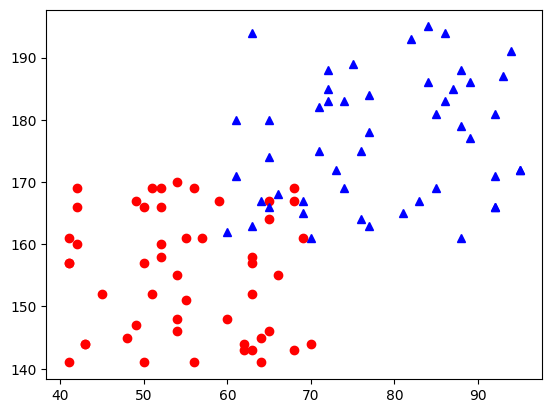

In [7]:
# print('여자 몸무게 :', [d[0] for d in data[::2]])
# print('여자 키 :', [d[1] for d in data[::2]])
# print('남자 몸무게 :', [d[0] for d in data[1::2]])
# print('남자 키 :', [d[1] for d in data[1::2]])
# for d in data[::2] :
#     plt.plot(d[0], d[1], 'o', color = 'r')
plt.plot([d[0] for d in data[::2]],
        [d[1] for d in data[::2]], 'o', color = 'r')
plt.plot([d[0] for d in data[1::2]],
        [d[1] for d in data[1::2]], '^', color = 'b')

# 2. 군집화 로직

In [8]:
# 초기 랜덤지점 2개

random_points = [[random.randint(40, 95), random.randint(140, 195)],
                 [random.randint(40, 95), random.randint(140, 195)]]
random_points

[[84, 183], [79, 147]]

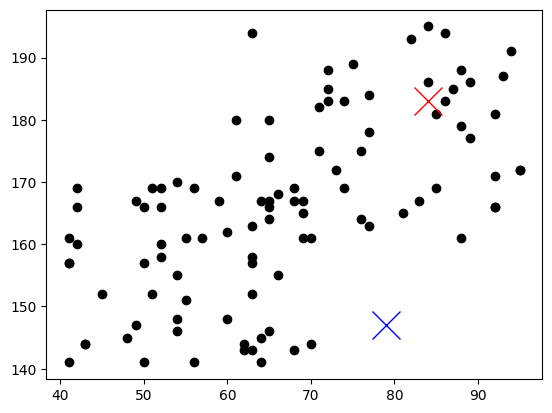

In [9]:
plt.plot([d[0] for d in data],
        [d[1] for d in data], 'o', color = 'k')
plt.plot(random_points[0][0], 
         random_points[0][1], 'x', color = 'r', markersize = 20)  # 기준점1
plt.plot(random_points[1][0], 
         random_points[1][1], 'x', color = 'b', markersize = 20)  # 기준점2

In [10]:
# 두 점의 거리를 return a:(0, 0) ~ b:(4, 3)

def dist(a, b) :
    return np.sqrt( (a[0] - b[0]) ** 2  + (a[1] - b[1]) ** 2 )

In [11]:
a = [1, 0]; b= [4, 3]
dist(a, b)

4.242640687119285

In [12]:
# random_points[0]과 random_points[1]을 기준으로 나눈 두 영역

group1 = []  # random_points[0]이 가까운 그룹
group2 = []  # random_points[1]이 가까운 그룹
for d in data :
    if dist(random_points[0], d) < dist(random_points[1], d) :
        group1.append(d)  # 빨간X랑 더 가까운 그룹
    else :
        group2.append(d)  # 파란 X랑 더 가까운 그룹
len(group1), len(group2)

(44, 56)

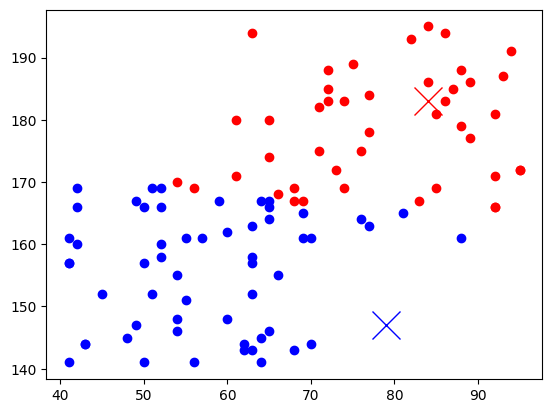

In [13]:
# 새로운 그룹 group1과 group2, 초기 램던 지점

plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color = 'r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color = 'b')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color = 'r', markersize = 20)  # 기준점1
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color = 'b', markersize = 20)  # 기준점2
plt.show()

In [14]:
# 기준점 이동 group1의 중심점, group2의 중심점

sumX = 0; sumY = 0
for g in group1 :
    sumX += g[0]
    sumY += g[1]
    
# 새로운 기준점으로 할당
random_points[0] = [sumX / len(group1), sumY / len(group1)]
sumX = 0; sumY = 0
for g in group2 :
    sumX += g[0]
    sumY += g[1]

# 새로운 기준점으로 할당
random_points[1] = [sumX / len(group2), sumY / len(group2)]
random_points

[[78.20454545454545, 178.6590909090909],
 [57.42857142857143, 155.82142857142858]]

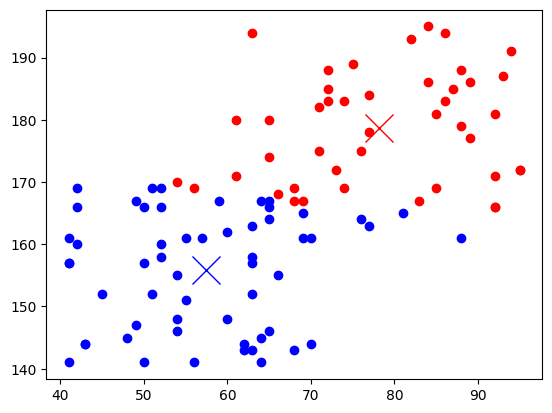

In [15]:
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color = 'r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color = 'b')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color = 'r', markersize = 20)  # 기준점1
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color = 'b', markersize = 20)  # 기준점2
plt.show()

# 3. 전체 코드 (for문 이용)

- data 생성
- 랜덤포인트2지점
- for문
    - 랜덤포인트 2지점기준으로 group1과 group2
    - 랜던포인트 이용(group1중간점, group2중간점)

초기 points :  [[51, 187], [62, 182]]
1 번째 points :  [[43.57142857142857, 161.85714285714286], [66.90322580645162, 165.46236559139786]]
2 번째 points :  [[47.48, 152.76], [71.2, 169.36]]
3 번째 points :  [[52.41025641025641, 151.3846153846154], [73.49180327868852, 174.04918032786884]]
4 번째 points :  [[54.520833333333336, 152.8125], [75.1923076923077, 176.65384615384616]]
5 번째 points :  [[55.15384615384615, 153.76923076923077], [76.22916666666667, 177.60416666666666]]
6 번째 points :  [[55.301886792452834, 154.0188679245283], [76.51063829787235, 177.82978723404256]]
7 번째 points :  [[55.55555555555556, 154.1851851851852], [76.67391304347827, 178.15217391304347]]
8 번째 points :  [[55.55555555555556, 154.1851851851852], [76.67391304347827, 178.15217391304347]]
9 번째 points :  [[55.55555555555556, 154.1851851851852], [76.67391304347827, 178.15217391304347]]
10 번째 points :  [[55.55555555555556, 154.1851851851852], [76.67391304347827, 178.15217391304347]]


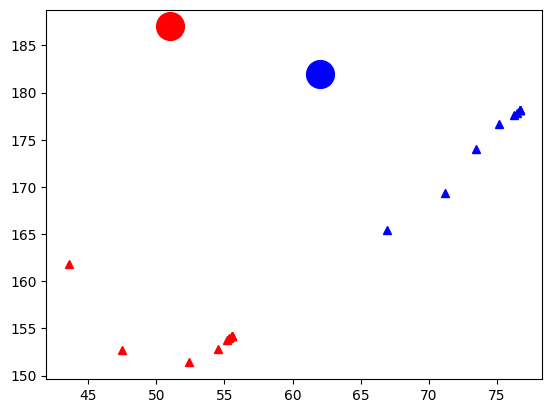

In [16]:
# 데이터 생성
data = []
for i in range(50) :
    # 여자 데이터
    data.append([random.randint(40, 70), random.randint(140, 170)])
    # 남자 데이터
    data.append([random.randint(60, 95), random.randint(160, 195)])
    
# point 지정
points = [[random.randint(40, 95), random.randint(140, 195)],
          [random.randint(40, 95), random.randint(140, 195)]]
print("초기 points : ", points)
plt.plot(points[0][0], points[0][1], 'o', c = 'r', markersize = 20)
plt.plot(points[1][0], points[1][1], 'o', c = 'b', markersize = 20)

# 포인트 2지점기준으로 group1과 group2
for i in range(1, 11) :
    group1 = []  # points[0]과 가까운 그룹
    group2 = []  # points[1]과 가까운 그룹
    for d in data :
        if dist(d, points[0]) < dist(d, points[1]) :
            group1.append(d)
        else :
            group2.append(d)
            
# 새로운 포인트로 할당
    sumX = 0; sumY = 0
    for g in group1 :
        sumX += g[0]
        sumY += g[1]
    points[0] = [sumX / len(group1), sumY / len(group1)]
    sumX = 0; sumY = 0
    for g in group2 :
        sumX += g[0]
        sumY += g[1]
    points[1] = [sumX / len(group2), sumY / len(group2)]
    print(i, "번째 points : ", points)
    plt.plot(points[0][0], points[0][1], '^', c = 'r')
    plt.plot(points[1][0], points[1][1], '^', c = 'b')

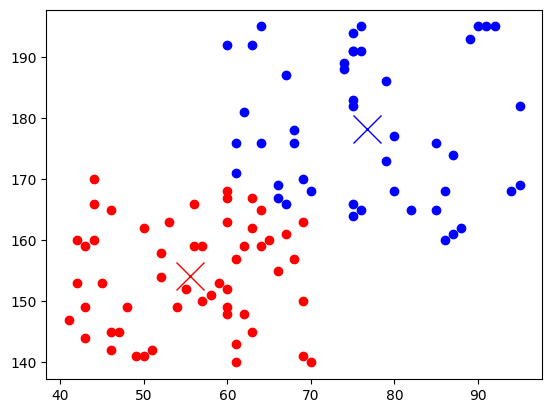

In [18]:
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color = 'r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color = 'b')
plt.plot(points[0][0], points[0][1], 'x', color = 'r', markersize = 20)
plt.plot(points[1][0], points[1][1], 'x', color = 'b', markersize = 20)
plt.show()

# api(sklearn)를 이용한 군집화

- sklearn 머신러닝
    - 예측모델; 분류, 회귀, 군집분석 fit(학습), predict(예측)
    - 변환모델; 전처리 ex. 스케일조정 fit(학습), transform(변환함수)

In [19]:
# 군집분석 라이브러리가 joblib충돌 경고 메세지 출력

import os

os.environ["OMP_NUM_THREADS"] = "1"

In [20]:
from sklearn.cluster import KMeans

data = np.array(data)
model = KMeans(n_clusters = 2,  # 2개 그룹으로 나눠
              init = 'random',  # 초기 중심점 랜덤하게
              n_init = 10,  # 10번 실행
              random_state = 7)
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [21]:
# 중심점

model.cluster_centers_

array([[ 77.51162791, 178.86046512],
       [ 56.03508772, 154.9122807 ]])

In [22]:
# 나눠진 그룹들의 인덱스

model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [23]:
group1 = data[model.labels_ == 1]
group2 = data[model.labels_ == 0]
c1, c2 = model.cluster_centers_

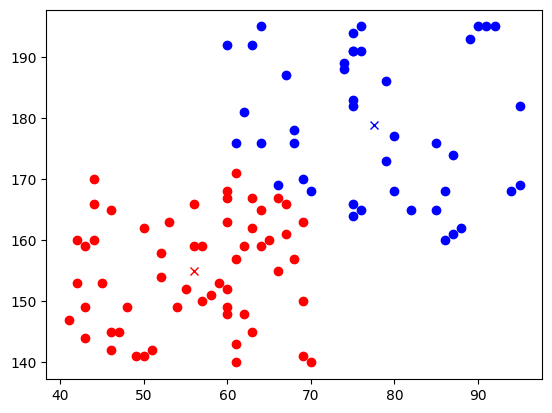

In [24]:
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color = 'r')
plt.plot([d[0] for d in group2],
         [d[1] for d in group2], 'o', color = 'b')
plt.plot(c1[0], c1[1], 'x', color = 'b')  # group2의 중심점
plt.plot(c2[0], c2[1], 'x', color = 'r')  # group1의 중심점